[![Binder](https://mybinder.org/badge_logo.svg)](https://nbviewer.org/github/Sistemas-Multimedia/Sistemas-Multimedia.github.io/blob/master/milestones/08-DWT/DWT_compression.ipynb)

# 2D-DWT image compression
Compressing color images with PNG and the YCoCg/2D-DWT. Remember to run [block_DCT_compression.ipynb](https://github.com/Sistemas-Multimedia/Sistemas-Multimedia.github.io/blob/master/milestones/07-DCT/block__DCT_compression.ipynb) first. See also [DWT.ipynb](https://github.com/Sistemas-Multimedia/MRVC/blob/master/src/DWT.py).

## Parameters

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import math
import numpy as np
from scipy import signal
import cv2
import os
import pywt
import pylab
!ln -sf ~/quantization/deadzone_quantizer.py .
!ln -sf ~/MRVC/src/image_3.py .
import image_3 as image
!ln -sf ~/MRVC/src/YCoCg.py .
import YCoCg
!ln -sf ~/MRVC/src/DWT.py .
import DWT
!ln -sf ~/quantization/information.py .
!ln -sf ~/quantization/distortion.py .
import distortion
#!ln -sf ~/MRVC/src/L_DWT.py
#!ln -sf ~/MRVC/src/H_DWT.py
!ln -sf ~/quantization/deadzone_quantizer.py .
import deadzone_quantizer as Q

Wavelet = Wavelet db5
  Family name:    Daubechies
  Short name:     db
  Filters length: 10
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False
DWT extension mode = periodization


In [5]:
def q_deq(x, quantization_step):
    k = Q.quantize(x, quantization_step)
    y = Q.dequantize(k, quantization_step)
    return y, k

In [6]:
def read_indexes(prefix):
    frame.read(prefix)
    
def write_indexes(prefix):
    frame.save(prefix)

In [7]:
#prefix = "/home/vruiz/MRVC/sequences/stockholm/"
prefix = "/home/vruiz/MRVC/sequences/lena_color/"
RGB_frame = image.read(prefix, 0)

image_3.read: /home/vruiz/MRVC/sequences/lena_color/000.png (512, 512, 3) uint8 512673 


In [8]:
def __normalize(img):
    max_component = np.max(img)
    min_component = np.min(img)
    max_min_component = max_component - min_component
    return (img-min_component)/max_min_component

def __show(img, title):
    img = normalize(img)
    plt.figure(figsize=(10,10))
    plt.title(title, fontsize=20)
    plt.imshow(img)

component=0 max=255 min=54 dtype=uint8
component=1 max=248 min=1 dtype=uint8
component=2 max=239 min=8 dtype=uint8


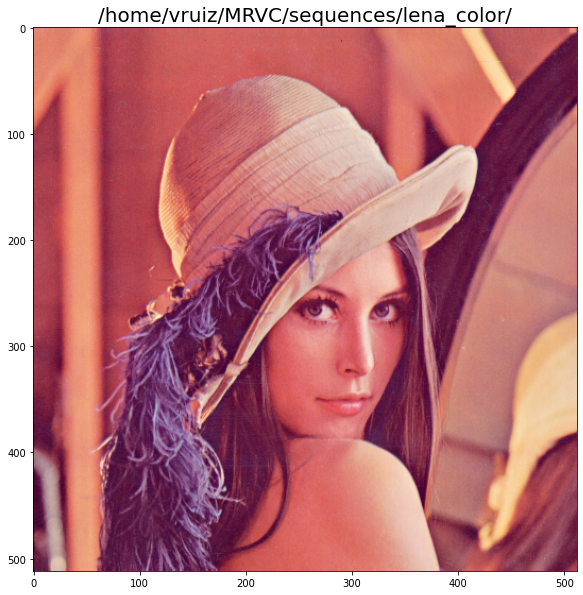

In [9]:
image.show(RGB_frame, prefix)

## Testing reversebility

### In the RGB domain

In [10]:
RGB_decomposition = DWT.analyze(RGB_frame, N_levels=3)
RGB_reconstructed_frame = DWT.synthesize(RGB_decomposition, N_levels=3).astype(np.int16)
(RGB_frame == RGB_reconstructed_frame).all()

False

In [11]:
type(RGB_decomposition)

list

In [12]:
len(RGB_decomposition)

4

In [13]:
type(RGB_decomposition[0])

numpy.ndarray

In [14]:
RGB_decomposition[0].shape

(64, 64, 3)

In [15]:
type(RGB_decomposition[1])

tuple

In [16]:
len(RGB_decomposition[1])

3

In [17]:
lowest_resolution = RGB_decomposition[0]
print(type(lowest_resolution), lowest_resolution.shape)
for resolution in RGB_decomposition[1:]:
    print(type(resolution))
    for subband in resolution:
        print(type(subband), subband.shape)

<class 'numpy.ndarray'> (64, 64, 3)
<class 'tuple'>
<class 'numpy.ndarray'> (64, 64, 3)
<class 'numpy.ndarray'> (64, 64, 3)
<class 'numpy.ndarray'> (64, 64, 3)
<class 'tuple'>
<class 'numpy.ndarray'> (128, 128, 3)
<class 'numpy.ndarray'> (128, 128, 3)
<class 'numpy.ndarray'> (128, 128, 3)
<class 'tuple'>
<class 'numpy.ndarray'> (256, 256, 3)
<class 'numpy.ndarray'> (256, 256, 3)
<class 'numpy.ndarray'> (256, 256, 3)


In [18]:
RGB_reconstructed_frame.shape

(512, 512, 3)

component=0 max=255 min=54 dtype=uint8
component=1 max=248 min=1 dtype=uint8
component=2 max=239 min=8 dtype=uint8


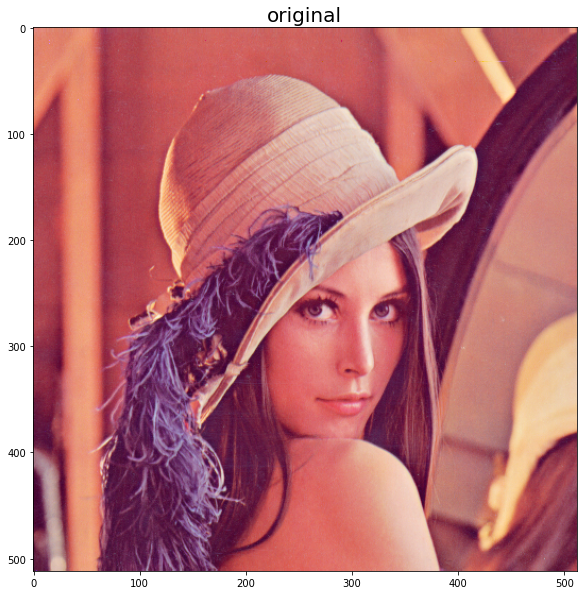

In [19]:
image.show(RGB_frame, "original")

component=0 max=255 min=54 dtype=int16
component=1 max=248 min=1 dtype=int16
component=2 max=239 min=7 dtype=int16


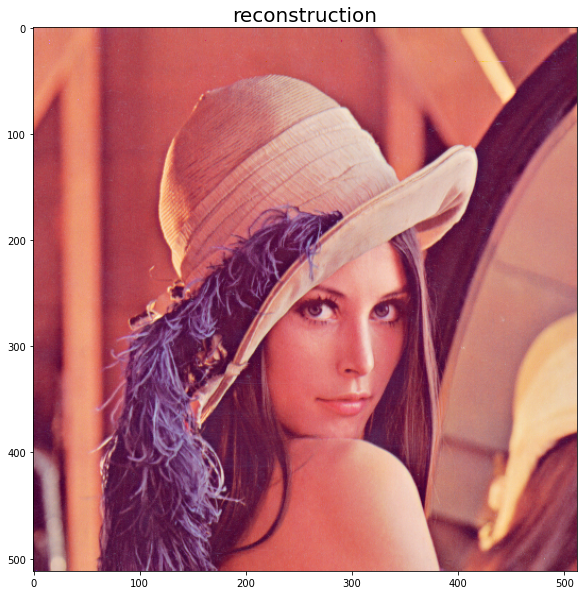

In [20]:
image.show(RGB_reconstructed_frame, "reconstruction")

component=0 max=1.0 min=0.0 dtype=float64
component=1 max=1.0 min=0.0 dtype=float64
component=2 max=1.0 min=0.0 dtype=float64


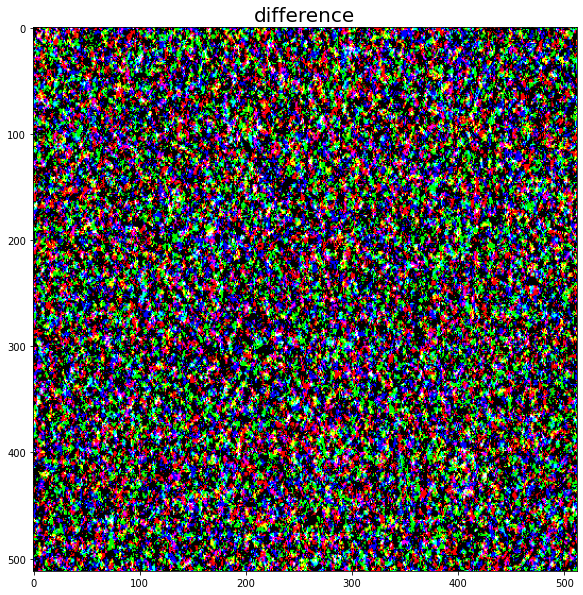

In [21]:
image.show(image.normalize(RGB_frame - RGB_reconstructed_frame), "difference")

### Reading and writting decompositions

In [24]:
DWT.write_decomposition(RGB_decomposition, "/tmp/", 0, N_levels=3)

error: OpenCV(4.5.2) /tmp/pip-req-build-dccdjyga/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<3, 4>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


In [23]:
_RGB_decomposition = DWT.read("/tmp/", 0, N_levels=3)

TypeError: read() got an unexpected keyword argument 'N_levels'

In [ ]:
RGB_decomposition.shape

### In the YCoCg domain

In [ ]:
YCoCg_frame = YCoCg.from_RGB(RGB_frame.astype(np.int16))
YCoCg_decomposition = DWT.analyze(YCoCg_frame, N_levels=2)
YCoCg_reconstructed_frame = DWT.synthesize(YCoCg_decomposition, N_levels=2)
RGB_reconstructed_frame = YCoCg.to_RGB(YCoCg_reconstructed_frame).astype(np.int16)
(RGB_frame == RGB_reconstructed_frame).all()

In [ ]:
image.show(RGB_frame, "original") 

In [ ]:
image.show(RGB_reconstructed_frame, "reconstruction")

In [ ]:
show(RGB_frame - RGB_reconstructed_frame, "difference")

### Reading and writting decompositions

In [ ]:
DWT.write(RGB_decomposition, "/tmp/", 0, N_levels=2)

In [ ]:
RGB_decomposition = DWT.read("/tmp/", 0, N_levels=2)

In [ ]:
YCoCg_reconstructed_frame = DWT.synthesize(YCoCg_decomposition, N_levels=2)
RGB_reconstructed_frame = YCoCg.to_RGB(YCoCg_reconstructed_frame).astype(np.int16)
image.show(RGB_reconstructed_frame, "reconstruction")

## Quantizing the RGB domain

In [2]:
RGB_points = []
with open('../05-RGB_compression/RGB.txt', 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RGB_points.append((float(rate), float(_distortion)))

## Quantizing the YCoCg domain

In [3]:
YCoCg_points = []
with open('../06-YUV_compression/YCoCg.txt', 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        YCoCg_points.append((float(rate), float(_distortion)))

## Quantizing the YCoCg+DCT domain

In [4]:
DCT_points = []
with open('../07-DCT/DCT.txt', 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        DCT_points.append((float(rate), float(_distortion)))

## Quantizing the YCoCg/DWT domain

In [25]:
def bytes_per_frame(img):
    frame.write(img, "/tmp/frame")
    length_in_bytes = os.path.getsize("/tmp/frame.png")
    return length_in_bytes

def bits_per_pixel(img):
    return 8*bytes_per_frame(img)/np.size(img)

def bytes_per_grayframe(img):
    cv2.imwrite("/tmp/frame.png", img)
    length_in_bytes = os.path.getsize("/tmp/frame.png")
    return length_in_bytes

def bits_per_graypixel(img):
    return 8*bytes_per_grayframe(img)/np.size(img)

In [26]:
N_LEVELS = 3
def _DWT_RD_curve(RGB_frame, n_levels=N_LEVELS):
    n_channels = RGB_frame.shape[2]
    RD_points = []
    for q_step in range(0, 8):
        YCoCg_frame = YCoCg.from_RGB(RGB_frame.astype(np.int16))
        YCoCg_decomposition = DWT.analyze(YCoCg_frame, n_levels=n_levels)
        dequantized_YCoCg_decomposition = []
        rate = 0
        for channel in range(n_channels):
            # In a channel there is a decomposition
            decomposition = YCoCg_decomposition[channel]
            cAn = decomposition[0]
            k, dequantized_cAn = q_deq(cAn, 1<<q_step)
            k = k.astype(np.uint8)
            dequantized_decomposition = [dequantized_cAn]
            rate += bytes_per_frame(k)
            rest_of_resolutions = decomposition[1:]
            for resolution in rest_of_resolutions:
                # In a resolution there is/are one/three subbands
                dequantized_resolution = []
                for subband in resolution:
                    k, dequantized_subband = q_deq(subband, 1<<q_step)
                    k = k.astype(np.uint8)
                    rate += bytes_per_grayframe(k)
                    dequantized_resolution.append(dequantized_subband)
                dequantized_decomposition.append(tuple(dequantized_resolution))
            dequantized_YCoCg_decomposition.append(dequantized_decomposition)
        reconstructed_YCoCg_frame = DWT.synthesize(dequantized_YCoCg_decomposition)
        reconstructed_RGB_frame = YCoCg.to_RGB(reconstructed_YCoCg_frame)
        distortion = MSE(RGB_frame, reconstructed_RGB_frame)
        print(f"q_step={1<<q_step:>3}, rate={rate:>7} bytes, distortion={distortion:>6.1f}")
        RD_points.append((rate, distortion))
    return RD_points

def DWT_RD_curve(RGB_frame, N_levels):
    n_channels = RGB_frame.shape[2]
    RD_points = []
    for q_step in range(0, 8):
        YUV_frame = YCoCg.from_RGB(RGB_frame.astype(np.int16))
        YUV_decomposition = DWT.analyze(YUV_frame, N_levels=N_levels)
        dequantized_YUV_decomposition = []
        rate = 0
        cAn = YUV_decomposition[0]
        dequantized_cAn, k = q_deq(cAn, 1<<q_step)
        #rate += bytes_per_frame(k.astype(np.uint8))
        rate += image.write((k + 128).astype(np.uint8), f"/tmp/{q_step}_", 0)
        dequantized_YUV_decomposition.append(dequantized_cAn)
        rest_of_resolutions = YUV_decomposition[1:]
        for resolution in rest_of_resolutions:
            dequantized_resolution = []
            for subband in resolution:
                dequantized_subband, k  = q_deq(subband, 1<<q_step)
                #rate += bytes_per_frame(k.astype(np.uint8))
                rate += image.write((k + 128).astype(np.uint8), f"/tmp/{q_step}_", 0)
                dequantized_resolution.append(dequantized_subband)
            dequantized_YUV_decomposition.append(tuple(dequantized_resolution))
        reconstructed_YUV_frame = DWT.synthesize(dequantized_YUV_decomposition, N_levels=N_levels)
        reconstructed_RGB_frame = YCoCg.to_RGB(reconstructed_YUV_frame)
        _distortion = distortion.MSE(RGB_frame, reconstructed_RGB_frame)
        print(f"q_step={1<<q_step:>3}, rate={rate:>7} bytes, distortion={_distortion:>6.1f}")
        RD_points.append((8*rate/RGB_frame.size, _distortion))
    return RD_points

DWT_points_1 = DWT_RD_curve(RGB_frame, N_levels=1)
DWT_points_2 = DWT_RD_curve(RGB_frame, N_levels=2)
DWT_points_3 = DWT_RD_curve(RGB_frame, N_levels=3)

image_3.write: /tmp/0_000.png (256, 256, 3) uint8 136560 
image_3.write: /tmp/0_000.png (256, 256, 3) uint8 95373 
image_3.write: /tmp/0_000.png (256, 256, 3) uint8 109627 
image_3.write: /tmp/0_000.png (256, 256, 3) uint8 92835 
q_step=  1, rate= 434395 bytes, distortion=   2.0
image_3.write: /tmp/1_000.png (256, 256, 3) uint8 112963 
image_3.write: /tmp/1_000.png (256, 256, 3) uint8 67229 
image_3.write: /tmp/1_000.png (256, 256, 3) uint8 81197 
image_3.write: /tmp/1_000.png (256, 256, 3) uint8 64195 
q_step=  2, rate= 325584 bytes, distortion=   4.8
image_3.write: /tmp/2_000.png (256, 256, 3) uint8 90001 
image_3.write: /tmp/2_000.png (256, 256, 3) uint8 33874 
image_3.write: /tmp/2_000.png (256, 256, 3) uint8 48749 
image_3.write: /tmp/2_000.png (256, 256, 3) uint8 30308 
q_step=  4, rate= 202932 bytes, distortion=  12.9
image_3.write: /tmp/3_000.png (256, 256, 3) uint8 69774 
image_3.write: /tmp/3_000.png (256, 256, 3) uint8 10255 
image_3.write: /tmp/3_000.png (256, 256, 3) uint8

image_3.write: /tmp/3_000.png (256, 256, 3) uint8 6788 
q_step=  8, rate=  83326 bytes, distortion=  20.6
image_3.write: /tmp/4_000.png (64, 64, 3) uint8 7326 
image_3.write: /tmp/4_000.png (64, 64, 3) uint8 2621 
image_3.write: /tmp/4_000.png (64, 64, 3) uint8 4290 
image_3.write: /tmp/4_000.png (64, 64, 3) uint8 2385 
image_3.write: /tmp/4_000.png (128, 128, 3) uint8 3755 
image_3.write: /tmp/4_000.png (128, 128, 3) uint8 6019 
image_3.write: /tmp/4_000.png (128, 128, 3) uint8 3244 
image_3.write: /tmp/4_000.png (256, 256, 3) uint8 3139 
image_3.write: /tmp/4_000.png (256, 256, 3) uint8 7083 
image_3.write: /tmp/4_000.png (256, 256, 3) uint8 1647 
q_step= 16, rate=  41509 bytes, distortion=  38.7
image_3.write: /tmp/5_000.png (64, 64, 3) uint8 5905 
image_3.write: /tmp/5_000.png (64, 64, 3) uint8 1584 
image_3.write: /tmp/5_000.png (64, 64, 3) uint8 2834 
image_3.write: /tmp/5_000.png (64, 64, 3) uint8 1449 
image_3.write: /tmp/5_000.png (128, 128, 3) uint8 1901 
image_3.write: /tmp/

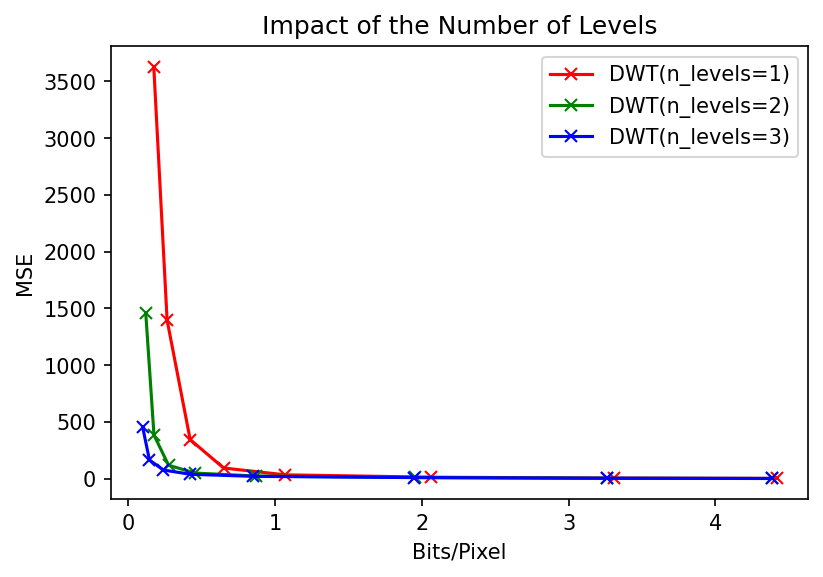

In [27]:
pylab.figure(dpi=150)
pylab.plot(*zip(*DWT_points_1), c='r', marker="x", label='DWT(n_levels=1)')
pylab.plot(*zip(*DWT_points_2), c='g', marker="x", label='DWT(n_levels=2)')
pylab.plot(*zip(*DWT_points_3), c='b', marker="x", label='DWT(n_levels=3)')
pylab.title("Impact of the Number of Levels")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("MSE")
plt.legend(loc='upper right')
pylab.show()

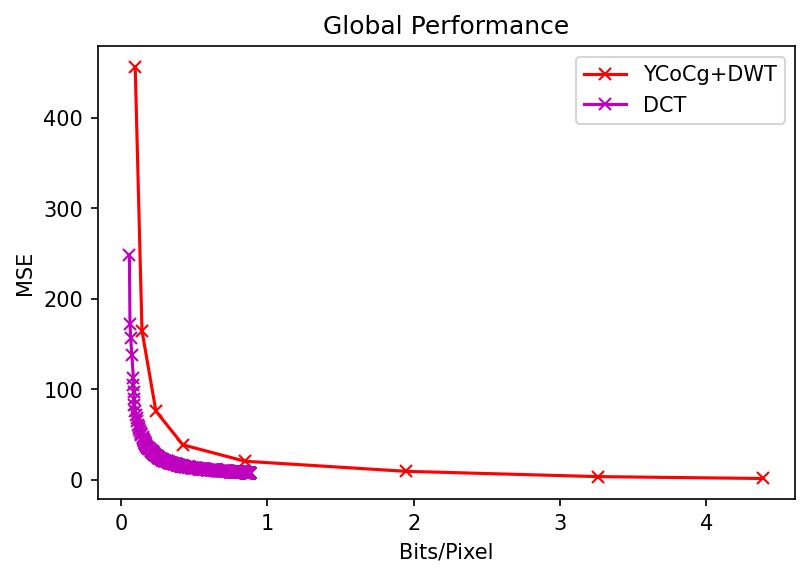

In [28]:
pylab.figure(dpi=150)
#pylab.plot(*zip(*RGB_points), c='b', marker="x", label='RGB')
#pylab.plot(*zip(*YCoCg_points), c='g', marker="x", label='YCoCg')
pylab.plot(*zip(*DWT_points_3), c='r', marker="x", label='YCoCg+DWT')
pylab.plot(*zip(*DCT_points), c='m', marker="x", label='DCT')
pylab.title("Global Performance")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("MSE")
plt.legend(loc='upper right')
#plt.yscale('log')
pylab.show()

In [ ]:
with open('DWT3.txt', 'w') as f:
    for item in DWT_points_3:
        f.write(f"{item[0]}\t{item[1]}\n")

## Ignore the rest

In [ ]:
def RGB_to_YCoCg(RGB_frame):
    R, G, B = RGB_frame[:,:,0], RGB_frame[:,:,1], RGB_frame[:,:,2]
    YCoCg_frame = np.empty_like(RGB_frame)
    YCoCg_frame[:,:,0] =  R/4 + G/2 + B/4 
    YCoCg_frame[:,:,1] =  R/2       - B/2
    YCoCg_frame[:,:,2] = -R/4 + G/2 - B/4
    return YCoCg_frame

def YCoCg_to_RGB(YCoCg_frame):
    Y, Co, Cg = YCoCg_frame[:,:,0], YCoCg_frame[:,:,1], YCoCg_frame[:,:,2]
    RGB_frame = np.empty_like(YCoCg_frame)
    RGB_frame[:,:,0] = Y + Co - Cg 
    RGB_frame[:,:,1] = Y      + Cg
    RGB_frame[:,:,2] = Y - Co - Cg
    return RGB_frame

In [ ]:
def _average_energy(x):
    return np.sum(x.astype(np.double)*x.astype(np.double))/(np.size(x))

def _MSE(x, y):
    error_signal = x.astype(np.float32) - y
    return average_energy(error_signal)

def _RMSE(x, y):
    error_signal = x.astype(np.float32) - y
    return math.sqrt(MSE(error_signal))

In [ ]:
def bytes_per_frame(_frame):
    frame.write(_frame, "/tmp/frame")
    length_in_bytes = os.path.getsize("/tmp/frame.png")
    return length_in_bytes

def bits_per_pixel(img):
    return 8*bytes_per_frame(img)/np.size(img)

def bytes_per_grayframe(_frame):
    cv2.imwrite("/tmp/frame.png", _frame)
    length_in_bytes = os.path.getsize("/tmp/frame.png")
    return length_in_bytes

def bits_per_graypixel(img):
    return 8*bytes_per_grayframe(img)/np.size(img)

In [ ]:
WAVELET = pywt.Wavelet("db5")
#WAVELET = pywt.Wavelet("bior3.5")
N_LEVELS = 3

def color_DWT_analyze(color_frame, wavelet=WAVELET, n_levels=N_LEVELS):
    n_channels = color_frame.shape[2]
    color_decomposition = [None]*n_channels
    for c in range(n_channels):
        color_decomposition[c] = pywt.wavedec2(data=color_frame[:,:,c], wavelet=wavelet, mode='per', level=n_levels)
    return color_decomposition # A list of "gray" decompositions

def _color_DWT_analyze(color_frame, wavelet=WAVELET, n_levels=N_LEVELS):
    n_channels = color_frame.shape[0]
    color_decomposition = [None]*n_channels
    for c in range(n_channels):
        color_decomposition[c] = pywt.wavedec2(data=color_frame[c], wavelet=wavelet, mode='per', level=n_levels)
    return color_decomposition # A list of "gray" decompositions

def color_DWT_synthesize(color_decomposition, wavelet=WAVELET):
    n_channels = len(color_decomposition)
    #n_levels = len(color_decomposition[0])-1
    # color_decomposition[0] <- First channel
    # color_decomposition[0][0] <- cAn (lowest frequecy subband) of the first channel
    # color_decomposition[0][1] <- (cHn, cVn, cDn) (lowest high-frequency subbands) of the first channel
    # color_decomposition[0][1][0] <- cHn (LH subband) of the first channel
    # See https://pywavelets.readthedocs.io/en/latest/ref/2d-dwt-and-idwt.html#d-multilevel-decomposition-using-wavedec2
    _color_frame = []
    for c in range(n_channels):
        frame = pywt.waverec2(color_decomposition[c], wavelet=wavelet, mode='per')
        _color_frame.append(frame)
    n_rows = _color_frame[0].shape[0]
    n_columns = _color_frame[0].shape[1]
    color_frame = np.ndarray((n_rows, n_columns, n_channels), np.float64)
    for c in range(n_channels):
        color_frame[:,:,c] = _color_frame[c][:,:]
    return color_frame

def _color_DWT_synthesize(color_decomposition, wavelet=WAVELET):
    n_channels = len(color_decomposition)
    #n_levels = len(color_decomposition[0])-1
    # color_decomposition[0] <- First channel
    # color_decomposition[0][0] <- cAn (lowest frequecy subband) of the first channel
    # color_decomposition[0][1] <- (cHn, cVn, cDn) (lowest high-frequency subbands) of the first channel
    # color_decomposition[0][1][0] <- cHn (LH subband) of the first channel
    # See https://pywavelets.readthedocs.io/en/latest/ref/2d-dwt-and-idwt.html#d-multilevel-decomposition-using-wavedec2
    _color_frame = []
    for c in range(n_channels):
        _frame = pywt.waverec2(color_decomposition[c], wavelet=wavelet, mode='per')
        _color_frame.append(_frame)
    #n_rows = _color_frame[1].shape[0]
    #n_columns = _color_frame[2].shape[1]
    #color_frame = np.ndarray((n_channels, n_rows, n_columns), np.float64)
    #for c in range(n_channels):
    #    color_frame[c] = _color_frame[c][:,:]
    return np.array(_color_frame)